<a href="https://colab.research.google.com/github/ericklopeh/ChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [37]:
# Cálculo de ingresos por tienda

ingreso_t1 = tienda['Precio'].sum()
ingreso_t2 = tienda2['Precio'].sum()
ingreso_t3 = tienda3['Precio'].sum()
ingreso_t4 = tienda4['Precio'].sum()

print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingreso_t1:,.0f}")
print(f"Tienda 2: ${ingreso_t2:,.0f}")
print(f"Tienda 3: ${ingreso_t3:,.0f}")
print(f"Tienda 4: ${ingreso_t4:,.0f}")


Ingresos totales por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


  Tienda       Ingreso
0     T1  1.150880e+09
1     T2  1.116344e+09
2     T3  1.098020e+09
3     T4  1.038376e+09


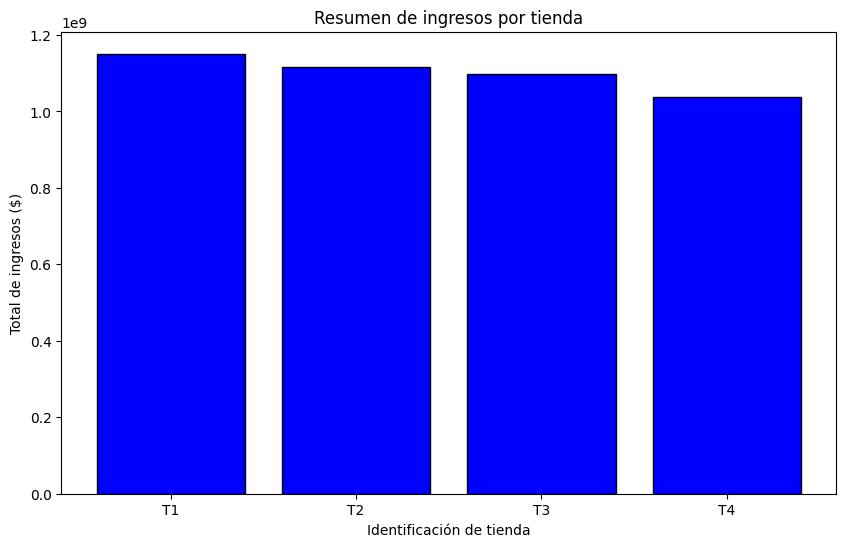

In [38]:
# Resumen financiero de cada tienda

import matplotlib.pyplot as plt

# Diccionario con datos de ingresos por tienda
ingresos = {
    "Tienda": ["T1", "T2", "T3", "T4"],
    "Ingreso": [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
}

# Conversión de datos a un DataFrame
df_ingresos = pd.DataFrame(ingresos)

# Visualización de datos en consola
print(df_ingresos)

# Representación gráfica de los ingresos
plt.figure(figsize=(10, 6))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso"], color="blue", edgecolor="black")
plt.title("Resumen de ingresos por tienda")
plt.xlabel("Identificación de tienda")
plt.ylabel("Total de ingresos ($)")
plt.show()


# 2. Ventas por categoría

In [39]:
# Clasificación de ventas por tipo de producto

ventas_t1 = tienda.groupby("Categoría del Producto").size().sort_values(ascending=False)
print("Resumen de ventas en Tienda 1:")
print(ventas_t1)

ventas_t2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
print("\nDistribución de ventas en Tienda 2:")
print(ventas_t2)

ventas_t3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
print("\nAnálisis de ventas en Tienda 3:")
print(ventas_t3)

ventas_t4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)
print("\nCategorías más vendidas en Tienda 4:")
print(ventas_t4)


Resumen de ventas en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Distribución de ventas en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Análisis de ventas en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64

Categorías más vendidas en Tienda 4:
Categoría

In [42]:
# Identificación de categorías más vendidas

categorias_populares = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Categoría Destacada": [
        ventas_por_categoria_tienda_1.idxmax(),  # Categoría con mayor demanda en Tienda 1
        ventas_por_categoria_tienda_2.idxmax(),  # Categoría líder en ventas en Tienda 2
        ventas_por_categoria_tienda_3.idxmax(),  # Producto estrella en Tienda 3
        ventas_por_categoria_tienda_4.idxmax()   # Artículo más solicitado en Tienda 4
    ],
    "Total de Ventas": [
        ventas_por_categoria_tienda_1.max(),  # Mayor cantidad de ventas en Tienda 1
        ventas_por_categoria_tienda_2.max(),  # Registro de ventas más alto en Tienda 2
        ventas_por_categoria_tienda_3.max(),  # Mejor desempeño en ventas en Tienda 3
        ventas_por_categoria_tienda_4.max()   # Categoría más exitosa en Tienda 4
    ]
}

# Conversión a DataFrame para análisis estructurado
df_categorias_populares = pd.DataFrame(categorias_populares)

# Presentación de resultados
print(df_categorias_populares)


     Tienda Categoría Destacada  Total de Ventas
0  Tienda 1             Muebles              465
1  Tienda 2             Muebles              442
2  Tienda 3             Muebles              499
3  Tienda 4             Muebles              480


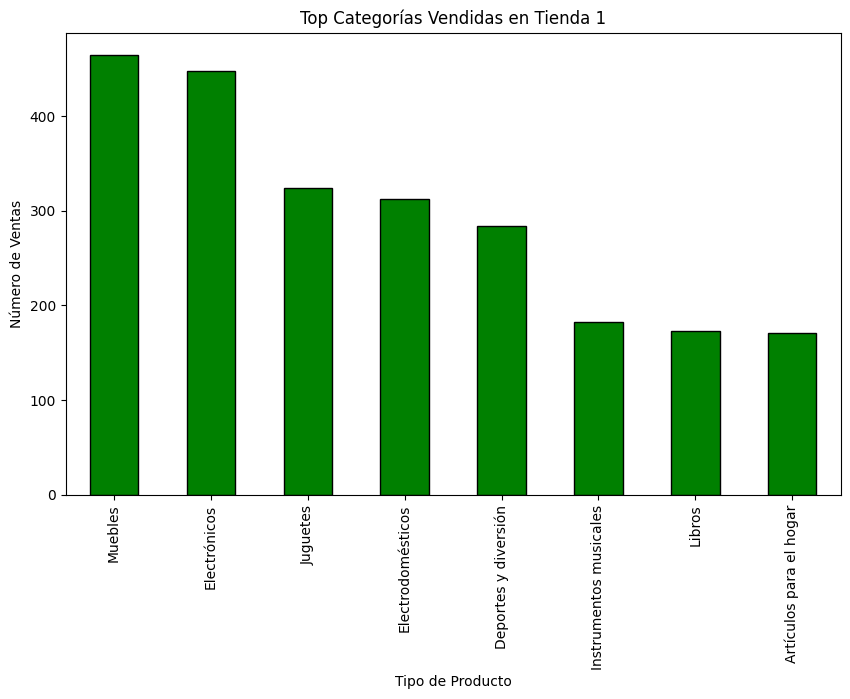

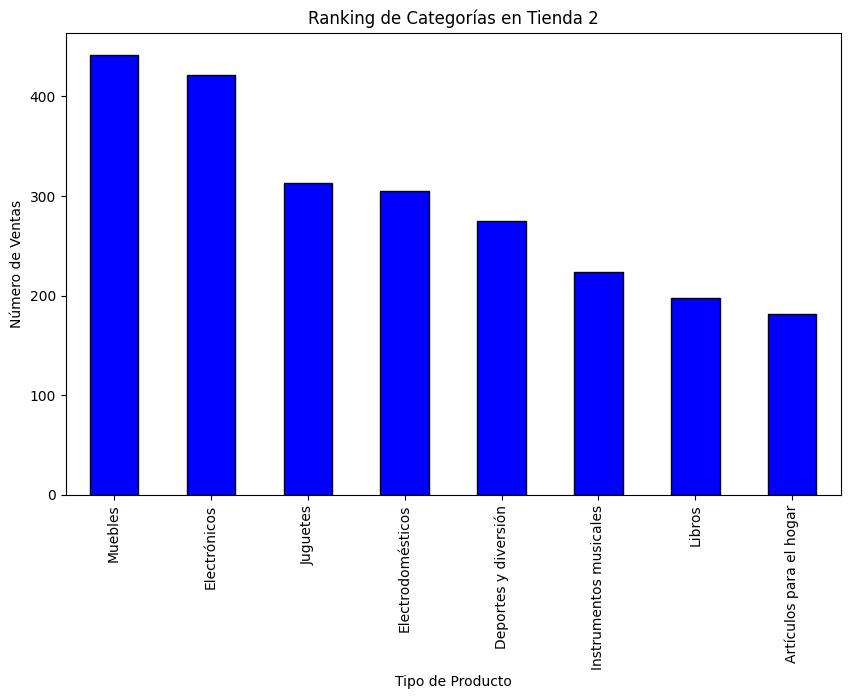

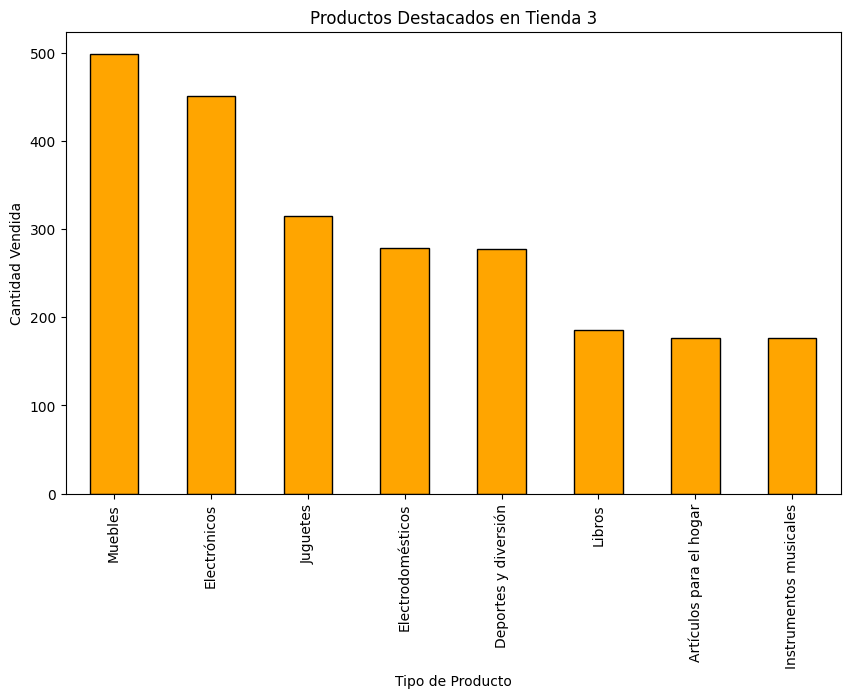

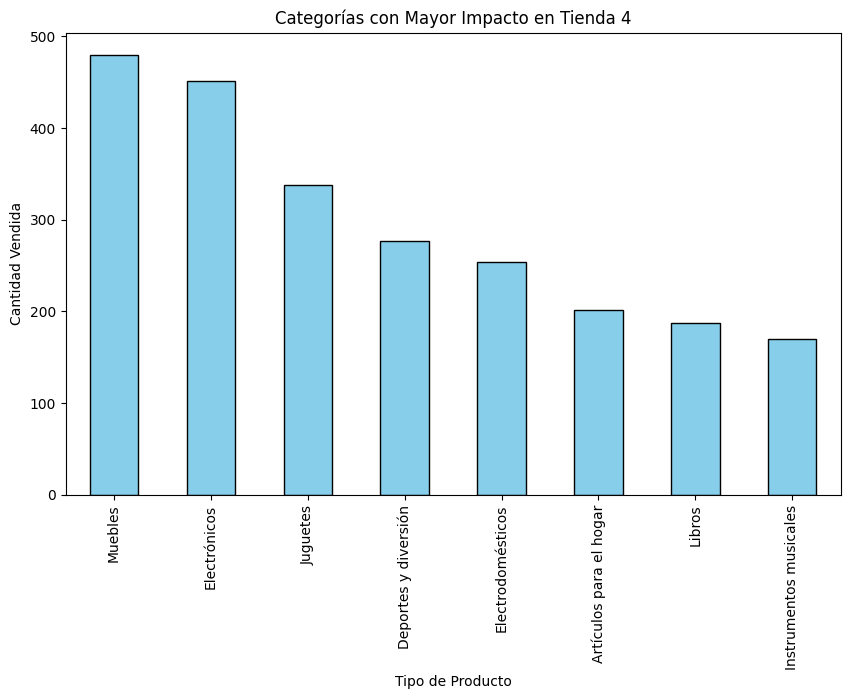

In [43]:
# Análisis gráfico de las categorías con mayor demanda

import matplotlib.pyplot as plt

# Visualización de la distribución de ventas en Tienda 1
ventas_por_categoria_tienda_1.head(10).plot(kind="bar", figsize=(10, 6), color="green", edgecolor="black")
plt.title("Top Categorías Vendidas en Tienda 1")
plt.xlabel("Tipo de Producto")
plt.ylabel("Número de Ventas")
plt.show()

# Gráfico comparativo de Tienda 2
ventas_por_categoria_tienda_2.head(10).plot(kind="bar", figsize=(10, 6), color="blue", edgecolor="black")
plt.title("Ranking de Categorías en Tienda 2")
plt.xlabel("Tipo de Producto")
plt.ylabel("Número de Ventas")
plt.show()

# Evaluación visual de las ventas por categoría en Tienda 3
ventas_por_categoria_tienda_3.head(10).plot(kind="bar", figsize=(10, 6), color="orange", edgecolor="black")
plt.title("Productos Destacados en Tienda 3")
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad Vendida")
plt.show()

# Representación gráfica de las tendencias de compra en Tienda 4
ventas_por_categoria_tienda_4.head(10).plot(kind="bar", figsize=(10, 6), color="skyblue", edgecolor="black")
plt.title("Categorías con Mayor Impacto en Tienda 4")
plt.xlabel("Tipo de Producto")
plt.ylabel("Cantidad Vendida")
plt.show()


# 3. Calificación promedio de la tienda


In [44]:
# Evaluación de satisfacción del cliente en cada tienda

calificacion_t1 = tienda["Calificación"].mean()
print(f"Nivel de satisfacción en Tienda 1: {calificacion_t1:.2f}")

calificacion_t2 = tienda2["Calificación"].mean()
print(f"Índice de valoración en Tienda 2: {calificacion_t2:.2f}")

calificacion_t3 = tienda3["Calificación"].mean()
print(f"Promedio de calificaciones en Tienda 3: {calificacion_t3:.2f}")

calificacion_t4 = tienda4["Calificación"].mean()
print(f"Resultado de evaluación en Tienda 4: {calificacion_t4:.2f}")


Nivel de satisfacción en Tienda 1: 3.98
Índice de valoración en Tienda 2: 4.04
Promedio de calificaciones en Tienda 3: 4.05
Resultado de evaluación en Tienda 4: 4.00


In [45]:
# Evaluación general de la satisfacción del cliente por tienda

# Diccionario con los valores promedio de calificación
calificaciones = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Promedio de Opinión": [
        calificacion_promedio_tienda_1,
        calificacion_promedio_tienda_2,
        calificacion_promedio_tienda_3,
        calificacion_promedio_tienda_4
    ]
}

# Conversión del diccionario en un DataFrame estructurado
df_calificaciones = pd.DataFrame(calificaciones)

# Presentación de resultados en consola
print(df_calificaciones)


     Tienda  Promedio de Opinión
0  Tienda 1             3.976685
1  Tienda 2             4.037304
2  Tienda 3             4.048326
3  Tienda 4             3.995759


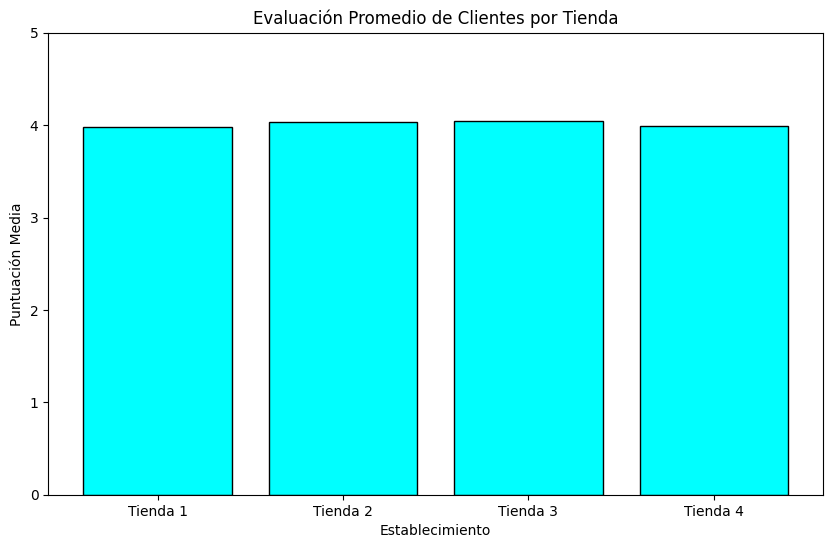

In [46]:
# Representación gráfica de la satisfacción del cliente

import matplotlib.pyplot as plt

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_calificaciones_promedio["Tienda"], df_calificaciones_promedio["Calificación Promedio"], color="cyan", edgecolor="black")
plt.title("Evaluación Promedio de Clientes por Tienda")
plt.xlabel("Establecimiento")
plt.ylabel("Puntuación Media")
plt.ylim(0, 5)  # Escala de calificación de 0 a 5
plt.show()


# 4. Productos más y menos vendidos

In [47]:
# Análisis de los productos con mejor y peor desempeño en ventas

# Tienda 1
# Registro de ventas por producto
ventas_t1 = tienda.groupby("Producto").size().sort_values(ascending=False)

# Identificación de productos con mayor y menor demanda
producto_top_t1 = ventas_t1.idxmax()
cantidad_top_t1 = ventas_t1.max()
producto_low_t1 = ventas_t1.idxmin()
cantidad_low_t1 = ventas_t1.min()

print(f"Tienda 1 - Producto estrella: {producto_top_t1} ({cantidad_top_t1} unidades)")
print(f"Tienda 1 - Producto menos solicitado: {producto_low_t1} ({cantidad_low_t1} unidades)")

# Tienda 2
ventas_t2 = tienda2.groupby("Producto").size().sort_values(ascending=False)
producto_top_t2 = ventas_t2.idxmax()
cantidad_top_t2 = ventas_t2.max()
producto_low_t2 = ventas_t2.idxmin()
cantidad_low_t2 = ventas_t2.min()

print(f"Tienda 2 - Producto líder en ventas: {producto_top_t2} ({cantidad_top_t2} unidades)")
print(f"Tienda 2 - Producto con menos movimiento: {producto_low_t2} ({cantidad_low_t2} unidades)")

# Tienda 3
ventas_t3 = tienda3.groupby("Producto").size().sort_values(ascending=False)
producto_top_t3 = ventas_t3.idxmax()
cantidad_top_t3 = ventas_t3.max()
producto_low_t3 = ventas_t3.idxmin()
cantidad_low_t3 = ventas_t3.min()

print(f"Tienda 3 - Producto más exitoso: {producto_top_t3} ({cantidad_top_t3} unidades)")
print(f"Tienda 3 - Producto con menor demanda: {producto_low_t3} ({cantidad_low_t3} unidades)")

# Tienda 4
ventas_t4 = tienda4.groupby("Producto").size().sort_values(ascending=False)
producto_top_t4 = ventas_t4.idxmax()
cantidad_top_t4 = ventas_t4.max()
producto_low_t4 = ventas_t4.idxmin()
cantidad_low_t4 = ventas_t4.min()

print(f"Tienda 4 - Producto favorito de los clientes: {producto_top_t4} ({cantidad_top_t4} unidades)")
print(f"Tienda 4 - Producto menos adquirido: {producto_low_t4} ({cantidad_low_t4} unidades)")


Tienda 1 - Producto estrella: Armario (60 unidades)
Tienda 1 - Producto menos solicitado: Celular ABXY (33 unidades)
Tienda 2 - Producto líder en ventas: Iniciando en programación (65 unidades)
Tienda 2 - Producto con menos movimiento: Juego de mesa (32 unidades)
Tienda 3 - Producto más exitoso: Kit de bancas (57 unidades)
Tienda 3 - Producto con menor demanda: Bloques de construcción (35 unidades)
Tienda 4 - Producto favorito de los clientes: Cama box (62 unidades)
Tienda 4 - Producto menos adquirido: Guitarra eléctrica (33 unidades)


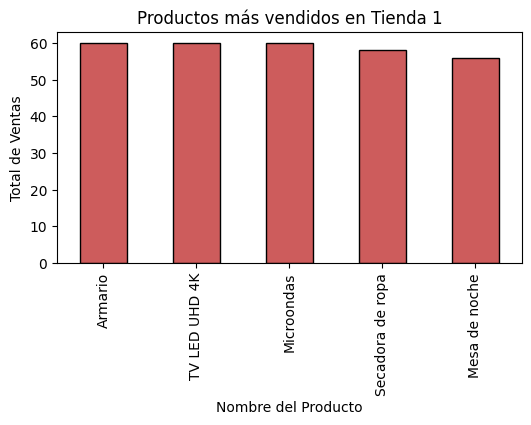

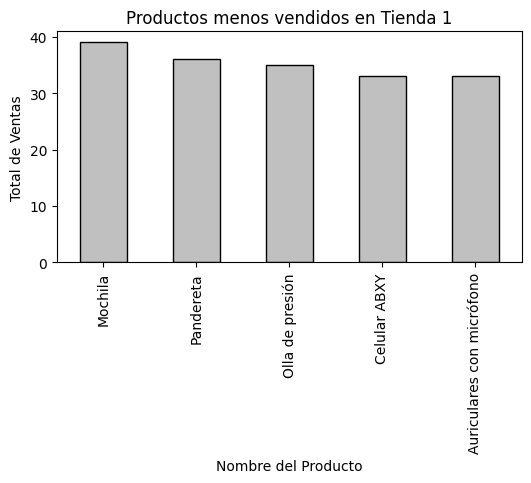

In [48]:
# Análisis visual de desempeño de productos en ventas

import matplotlib.pyplot as plt

# Gráfico de los productos más comprados en Tienda 1
ventas_por_producto_tienda_1.head(5).plot(kind="bar", figsize=(6, 3), color="indianred", edgecolor="black")
plt.title("Productos más vendidos en Tienda 1")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()

# Gráfico de los productos con menor demanda en Tienda 1
ventas_por_producto_tienda_1.tail(5).plot(kind="bar", figsize=(6, 3), color="silver", edgecolor="black")
plt.title("Productos menos vendidos en Tienda 1")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()


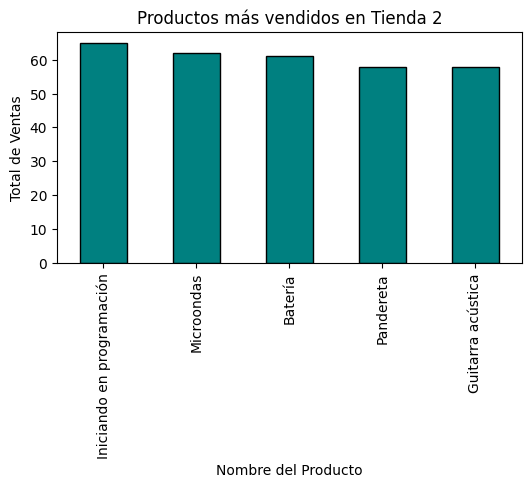

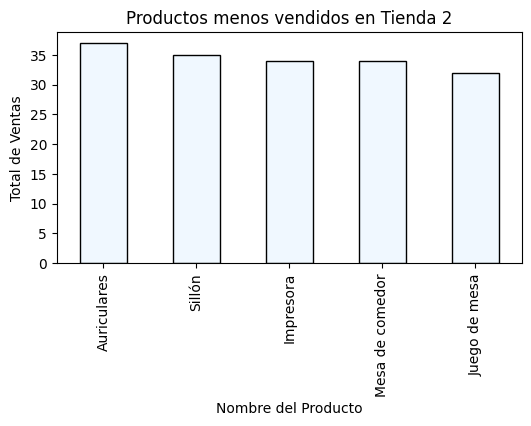

In [49]:
# Análisis visual de ventas en Tienda 2

# Gráfico con los productos más comprados
ventas_por_producto_tienda_2.head(5).plot(kind="bar", figsize=(6, 3), color="teal", edgecolor="black")
plt.title("Productos más vendidos en Tienda 2")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()

# Gráfico con los productos menos populares
ventas_por_producto_tienda_2.tail(5).plot(kind="bar", figsize=(6, 3), color="aliceblue", edgecolor="black")
plt.title("Productos menos vendidos en Tienda 2")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()


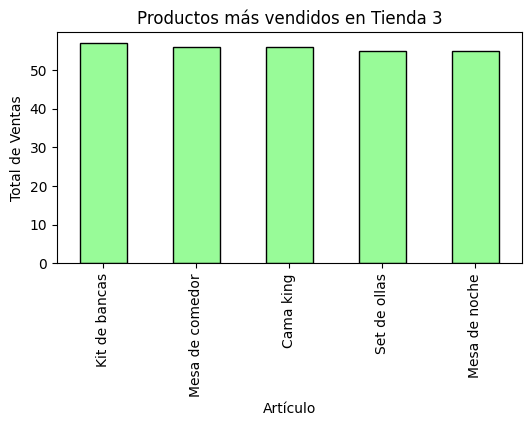

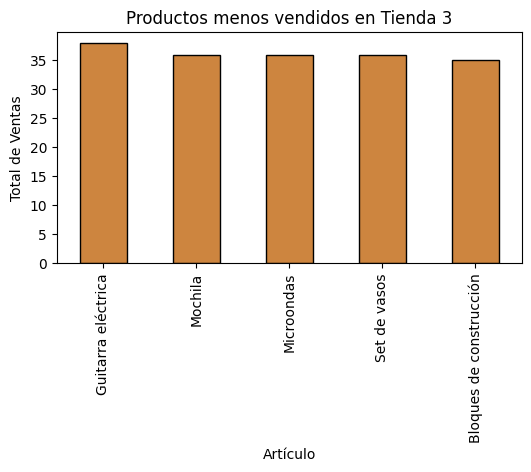

In [50]:
# Análisis de ventas en Tienda 3

# Gráfico con los productos más adquiridos
ventas_por_producto_tienda_3.head(5).plot(kind="bar", figsize=(6, 3), color="palegreen", edgecolor="black")
plt.title("Productos más vendidos en Tienda 3")
plt.xlabel("Artículo")
plt.ylabel("Total de Ventas")
plt.show()

# Gráfico con los productos menos demandados
ventas_por_producto_tienda_3.tail(5).plot(kind="bar", figsize=(6, 3), color="peru", edgecolor="black")
plt.title("Productos menos vendidos en Tienda 3")
plt.xlabel("Artículo")
plt.ylabel("Total de Ventas")
plt.show()


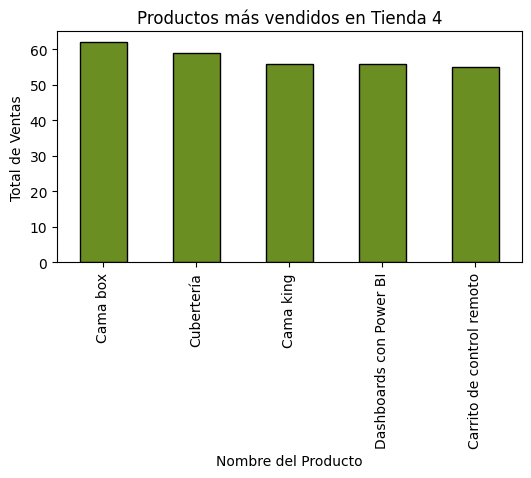

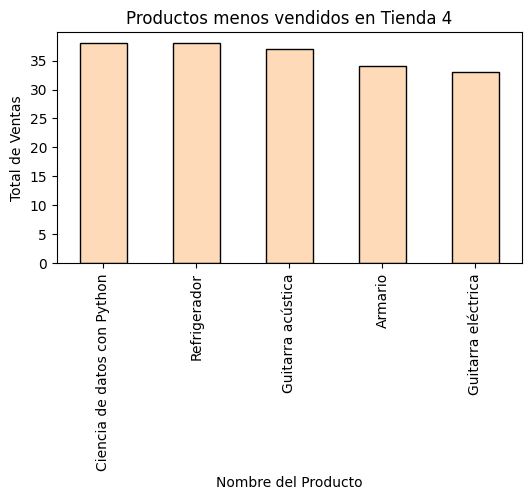

In [51]:
# Análisis gráfico de rendimiento de productos en Tienda 4

# Visualización de los artículos con mayor demanda
ventas_por_producto_tienda_4.head(5).plot(kind="bar", figsize=(6, 3), color="olivedrab", edgecolor="black")
plt.title("Productos más vendidos en Tienda 4")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()

# Visualización de los artículos con menor demanda
ventas_por_producto_tienda_4.tail(5).plot(kind="bar", figsize=(6, 3), color="peachpuff", edgecolor="black")
plt.title("Productos menos vendidos en Tienda 4")
plt.xlabel("Nombre del Producto")
plt.ylabel("Total de Ventas")
plt.show()


# 5. Envío promedio por tienda

In [52]:
# Análisis de costos de envío promedio por tienda

# Cálculo del gasto promedio en envíos por tienda
costo_t1 = tienda["Costo de envío"].mean()
print(f"Gasto medio de envío en Tienda 1: ${costo_t1:.2f}")

costo_t2 = tienda2["Costo de envío"].mean()
print(f"Gasto estimado de envío en Tienda 2: ${costo_t2:.2f}")

costo_t3 = tienda3["Costo de envío"].mean()
print(f"Promedio de costos de envío en Tienda 3: ${costo_t3:.2f}")

costo_t4 = tienda4["Costo de envío"].mean()
print(f"Inversión promedio en envíos en Tienda 4: ${costo_t4:.2f}")


Gasto medio de envío en Tienda 1: $26018.61
Gasto estimado de envío en Tienda 2: $25216.24
Promedio de costos de envío en Tienda 3: $24805.68
Inversión promedio en envíos en Tienda 4: $23459.46


In [53]:
# Análisis del gasto en envíos por tienda

# Diccionario con los costos promedio de envío por establecimiento
costos_envio = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo Promedio de Envío": [
        costo_envio_promedio_tienda_1,
        costo_envio_promedio_tienda_2,
        costo_envio_promedio_tienda_3,
        costo_envio_promedio_tienda_4
    ]
}

# Conversión del diccionario a DataFrame para estructurar la información
df_costos_envio = pd.DataFrame(costos_envio)

# Visualización de los resultados
print(df_costos_envio)


     Tienda  Costo Promedio de Envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


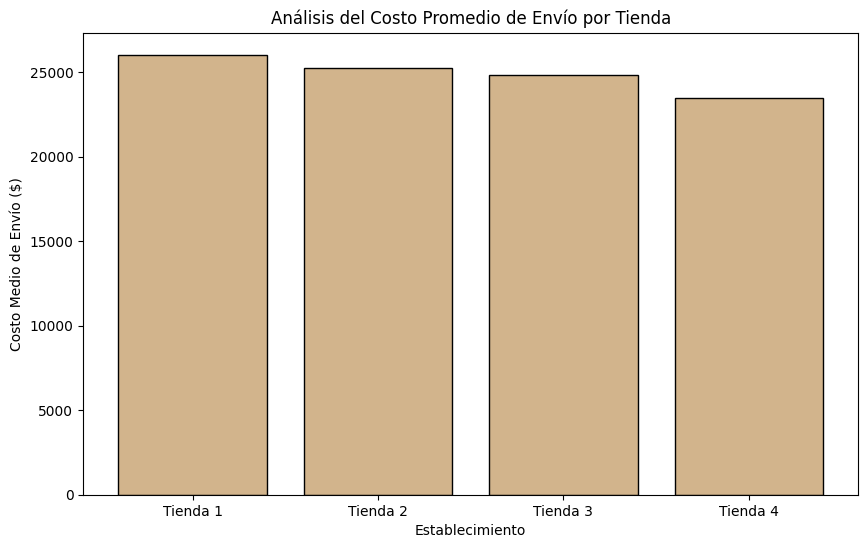

In [54]:
# Representación visual de los costos de envío por tienda

import matplotlib.pyplot as plt

# Creación del gráfico de barras para mostrar la inversión en envíos
plt.figure(figsize=(10, 6))
plt.bar(df_costos_envio_promedio["Tienda"], df_costos_envio_promedio["Costo de Envío Promedio"], color="tan", edgecolor="black")
plt.title("Análisis del Costo Promedio de Envío por Tienda")
plt.xlabel("Establecimiento")
plt.ylabel("Costo Medio de Envío ($)")
plt.show()
